#Computer Vision Classic : Weekend Hackathon #11

This weekend we bring you the classic Computer Vision problem, the Dogs vs Cats. In this hackathon, you will be provided with images of cats and dogs and you must use  your Computer Vision skills to build an image classifier to classify an image as that of a dog or of a cat. In this supervised image classification task, your goal is to classify the images into their respective classes using accuracy as a metric. The Dogs vs Cats is a classic dataset and has been used to train and evaluate models for binary classification tasks. With today's State-of-the-art Computer Vision models, we expect all the participants to achieve an accuracy of more than 90%.

Data :

* Train (Folder): contains 9471 images of cats and dogs
* Test (Folder): contains 4059 images of cats and dogs
* Sample_Submission.csv : The format of submission accepted
* Train.csv : contains the file name and appropriate category for each image in the train data
* Test.csv : contains the file name for each image in the test data

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/dee-walia20/CNN-Image-Classification/blob/master/MS_Hackathon_11_V6.ipynb)


In [ ]:
#Data stored in my Google drive, mount it here to access the data
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
train_dir = "/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/DATA/Train"
test_dir = "/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/DATA/Test"

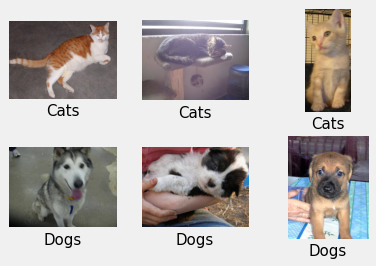

In [ ]:
#Plotting first 3 images for both classes
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(8,8))
photo_no= 1
for folder in os.listdir(train_dir):
    for i in range(3):
        plt.subplot(2,3,photo_no)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        folder_dir = os.listdir(os.path.join(train_dir,folder))
        img = plt.imread(os.path.join(os.path.join(train_dir,folder),folder_dir[i]))
        plt.imshow(img)
        plt.xlabel(folder, fontsize=15)
        photo_no += 1
plt.show()

In [ ]:
print(os.listdir(train_dir))

['Cats', 'Dogs']


In [ ]:
#Creating list of image location and class label
train_list=[]
train_label=[]
for folder in os.listdir(train_dir):
    for img_file in os.listdir(os.path.join(train_dir, folder)):
        dir_path=os.path.join(train_dir,folder)
        train_list.append(os.path.join(dir_path,img_file))
        if folder == 'Cats':
            train_label.append('Cats')
        else:
            train_label.append('Dogs')

In [ ]:
print(train_list)
print(train_label)

['/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/DATA/Train/Cats/17550.jpg', '/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/DATA/Train/Cats/11055.jpg', '/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/DATA/Train/Cats/13209.jpg', '/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/DATA/Train/Cats/13676.jpg', '/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/DATA/Train/Cats/14928.jpg', '/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/DATA/Train/Cats/10166.jpg', '/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/DATA/Train/Cats/13263.jpg', '/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/DATA/Train/Cats/7036.jpg', '/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/DATA/Train/Cats/12434.jpg', '/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/DATA/Train/Cats/16467.jpg', 

In [ ]:
#pandas dataframe of images and labels
import pandas as pd
df = pd.DataFrame({'img':train_list, 'label':train_label})
df.head()

,img,label
0,/content/gdrive/My Drive/Deep Learning Class/H...,Cats
1,/content/gdrive/My Drive/Deep Learning Class/H...,Cats
2,/content/gdrive/My Drive/Deep Learning Class/H...,Cats
3,/content/gdrive/My Drive/Deep Learning Class/H...,Cats
4,/content/gdrive/My Drive/Deep Learning Class/H...,Cats


In [ ]:
#split the train data into 2/3 for training and 1/3 for validation
train_info = df.sample(frac=0.67, random_state=1)
validation_info = df.drop(train_info.index)

In [ ]:
train_info.head()

,img,label
5196,/content/gdrive/My Drive/Deep Learning Class/H...,Dogs
9256,/content/gdrive/My Drive/Deep Learning Class/H...,Dogs
2653,/content/gdrive/My Drive/Deep Learning Class/H...,Cats
5930,/content/gdrive/My Drive/Deep Learning Class/H...,Dogs
4186,/content/gdrive/My Drive/Deep Learning Class/H...,Cats


In [ ]:
train_info.label.value_counts()

Cats    3190
Dogs    3156
Name: label, dtype: int64

In [ ]:
validation_info.label.value_counts()

Dogs    1568
Cats    1557
Name: label, dtype: int64

In [ ]:
#Import all libaries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

#For resizing all images to 200x200 resolution with color channel ofcourse
IMG_Height=200
IMG_Width=200

In [ ]:
#Using Keras ImagaDataGenerator to produce batches of images while training
train_data_gen=ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)

train_img_gen=train_data_gen.flow_from_dataframe(
    dataframe=train_info,
    x_col='img',
    y_col='label',
    class_mode='categorical',
    target_size=(IMG_Height, IMG_Width),
    batch_size=32,
    shuffle=True
    )


val_data_gen=ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)

val_img_gen = val_data_gen.flow_from_dataframe(
    dataframe=validation_info,
    x_col='img',
    y_col='label',
    class_mode='categorical',
    target_size=(IMG_Height, IMG_Width),
    batch_size=32,
    shuffle=False
    )


Found 6346 validated image filenames belonging to 2 classes.
Found 3125 validated image filenames belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16

In [ ]:
#Using pre-trained model of VGG16
model_1 = VGG16(include_top=False, weights='imagenet', input_shape=(IMG_Height, IMG_Width,3))
model_1 = Model(inputs = model_1.input, outputs = model_1.layers[-5].output)

for layer in model_1.layers:
    layer.trainable = False

model_2 = VGG16(include_top=False, weights='imagenet', input_shape=(IMG_Height, IMG_Width,3))

#Keeping the last conv block of VGG16 trainable for better acuuracy
x = model_1.output
for layer in model_2.layers[-4::1]:
    x = (layer)(x)

x = Conv2D(64,3,padding = 'same', activation='relu')(x)
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.001))(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.001))(x)
x = Dropout(0.2)(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputs = model_1.input, outputs = x)
model.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
____________________________________________________________

In [ ]:
#Initialize loss and optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
train_volume=len(train_img_gen.filenames)

In [ ]:
#Checkpoint created if model training is halted in between to restore
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_filepath = "/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/model"
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
                                   save_weights_only=True,
                                   monitor='val_accuracy',
                                   mode='max',
                                   save_best_only=True)

In [ ]:
#Model Training
history = model.fit(train_img_gen,
                    validation_data= val_img_gen,
                    callbacks = [model_checkpoint],
                    steps_per_epoch = train_volume//256, epochs=10)

Epoch 1/10
24/24 [==============================] - 1094s 46s/step - loss: 1.6124 - accuracy: 0.6914 - val_loss: 1.4191 - val_accuracy: 0.8832
Epoch 2/10
24/24 [==============================] - 202s 8s/step - loss: 1.3813 - accuracy: 0.8919 - val_loss: 1.3338 - val_accuracy: 0.9226
Epoch 3/10
24/24 [==============================] - 171s 7s/step - loss: 1.3245 - accuracy: 0.9141 - val_loss: 1.2839 - val_accuracy: 0.9200
Epoch 4/10
24/24 [==============================] - 177s 7s/step - loss: 1.2587 - accuracy: 0.9284 - val_loss: 1.2337 - val_accuracy: 0.9299
Epoch 5/10
24/24 [==============================] - 133s 6s/step - loss: 1.2291 - accuracy: 0.9182 - val_loss: 1.5039 - val_accuracy: 0.6170
Epoch 6/10
24/24 [==============================] - 127s 5s/step - loss: 1.2265 - accuracy: 0.8867 - val_loss: 1.1572 - val_accuracy: 0.9331
Epoch 7/10
24/24 [==============================] - 147s 6s/step - loss: 1.1394 - accuracy: 0.9336 - val_loss: 1.1157 - val_accuracy: 0.9402
Epoch 8/10


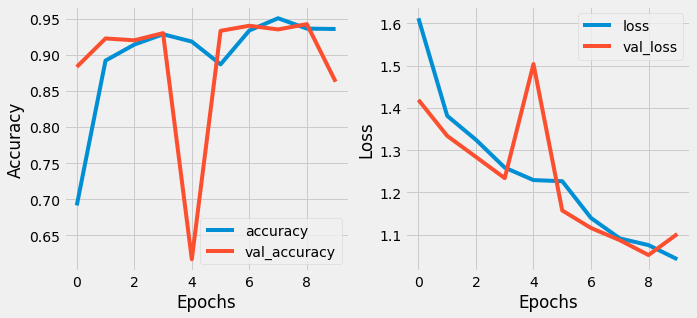

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right', fontsize=14)
plt.subplot(2,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right', fontsize=14)
plt.show()

In [ ]:
#Test batches
test_img_gen = val_data_gen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_Height, IMG_Width),
    batch_size=512,
    class_mode=None,
    shuffle=False
    )


Found 4059 images belonging to 1 classes.


In [ ]:
#Model Prediction on test data
prediction = model.predict(test_img_gen, batch_size=512)

In [ ]:
import numpy as np
prediction_np = np.argmax(prediction,axis=1) # to get back classes from prediction

In [ ]:
#saving in submission format
Submission = pd.DataFrame({'File_Name':test_img_gen.filenames, 'Category':prediction_np})
Submission.File_Name = Submission.File_Name.str.replace('Images/',"")
Submission.head()

,File_Name,Category
0,Images/10005.jpg,1
1,Images/10007.jpg,1
2,Images/10008.jpg,0
3,Images/10009.jpg,0
4,Images/10011.jpg,0


In [ ]:
Submission.to_csv("/content/gdrive/My Drive/Deep Learning Class/Hackathon/MS Hackathon 11/Submission.csv")